# My attempt at Case Study 3

In [2]:
with open('./CaseStudyFiles/headlines.txt') as f:
    lines = f.readlines()
    
print(type(lines))
print(len(lines))

<class 'list'>
650


In [6]:
# Start by testing knowledge with the Zika virus
zika_headlines = [headline for headline in lines if 'Zika' in headline]
print(len(zika_headlines))
print(zika_headlines[0])

227
Zika Outbreak Hits Miami



In [50]:
from cartopy.crs import PlateCarree
import matplotlib.pyplot as plt
from geonamescache import GeonamesCache
import pprint as pp
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from math import cos, sin, asin
gc = GeonamesCache()

In [27]:
# Find the indexes of the cities hit by Zika
cities = gc.get_cities()
city_ids = list(cities.keys())
zika_cities = []

for city in cities.values():
    for headline in zika_headlines:
        if city['name'] in headline:
            zika_cities.append(city['name'])
            
print(len(zika_headlines))
print(len(zika_cities))

# print(len(cities))
# print(len(city_ids))
# for city in cities:
#     for headline in zika_headlines:
#         if city in headline:
#             zika_cities.append(index)
    
# print(len(zika_cities))

227
389


In [19]:
print(zika_cities)

['Santa Elena', 'Bella Vista', 'Vera', 'San Luis', 'San Juan', 'San Francisco', 'Bella Vista', 'Townsville', 'Rockhampton', 'Palm Beach', 'Palm Beach', 'Orange', 'Melbourne', 'Trinidad', 'Olinda', 'Natal', 'Limoeiro', 'Horizonte', 'Fortaleza', 'Santos', 'Salvador', 'Salvador', 'Rio Grande', 'Piracicaba', 'Orleans', 'Jacobina', 'Colombo', 'Colombo', 'Botucatu', 'Belo Horizonte', 'Barra', 'Manaus', 'Alvorada', 'Belmopan', 'Belize City', 'Windsor', 'Beni', 'Cham', 'Man', 'Man', 'Man', 'San Antonio', 'Bogo', 'Beijing', 'Villavicencio', 'Sincelejo', 'San Onofre', 'San Diego', 'Fresno', 'Florida', 'Florida', 'Caucasia', 'Bello', 'Barranquilla', 'San Juan', 'San Francisco', 'San Diego', 'Trinidad', 'San Luis', 'Havana', 'Florida', 'Florida', 'Cham', 'Quisqueya', 'Bella Vista', 'Oran', 'Santa Elena', 'Quito', 'Portoviejo', 'La Libertad', 'Vic', 'Ribeira', 'Pau', 'Orange', 'Croix', 'York', 'Windsor', 'Hyde', 'Wa', 'Ho', 'Ho', 'Ho', 'Ho', 'Ho', 'Ho', 'San Benito', 'Tegucigalpa', 'Sengkang', 'Pat

In [37]:
# Now with all of the cities, we need to get the coordinates to plot
# Run through all of the cities and record the most populous city's latitude and longitude
zika_latitudes = []
zika_longitudes = []

for city in zika_cities:
    best_city = max(gc.get_cities_by_name(city), key=lambda x: list(x.values())[0]['population'])
    best_city_id = list(best_city.keys())[0]
    zika_latitudes.append(best_city[best_city_id]['latitude'])
    zika_longitudes.append(best_city[best_city_id]['longitude'])
    
print(len(zika_latitudes))
print(len(zika_longitudes))

389
389


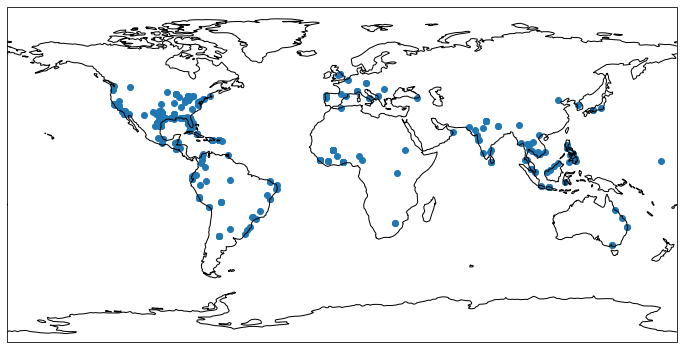

In [41]:
# Plotting the Zika Cities on a global map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.scatter(zika_longitudes, zika_latitudes)
ax.set_global()
ax.coastlines()
plt.show()

In [61]:
# Cluster the results with the Earth distance function
def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y1
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2), sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

def travel_distance(point_a, point_b):
    to_radians = np.radians([point_a[0], point_a[1], point_b[0], point_b[1]])
    return 3956 * great_circle_distance(*to_radians.tolist())

# def travel_distance(lat1, lon1, lat2, lon2):
#     to_radians = np.radians([lat1, lon1, lat2, lon2])
#     return 3956 * great_circle_distance(*to_radians.tolist())

cluster_model = DBSCAN(eps=1, min_samples=4, metric=travel_distance)
city_coordinates = [[zika_longitudes[i], zika_latitudes[i]] for i in range(len(zika_longitudes))]
clusters = cluster_model.fit_predict(city_coordinates)
# colors = ["green", "white", "yellow", "blue", "red", "purple", "pink", "cyan", "olive", "brown", "lime", "dusk", "shit", "blush", "coral", "sage", "cyan", "burple", "aqua", "wine", "ivory"]
colors = ['b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k']
zika_colors = [colors[cluster] for cluster in clusters]

print(clusters)

[-1  0 -1  1  2  3  0 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  5  5 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1
 -1  8  8 -1 -1 -1  2  3 -1 -1  1 -1  8  8 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1  4 -1 -1  6 -1 -1  9  9  9  9  9  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  5  5 -1 -1 10 10 10 10 10 10 10 10 10 10 -1 -1 -1 -1 11 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 11 11 -1 -1 -1 -1 -1 -1 -1  7
 -1  1  2  3  3  7  7 -1 -1 12 12 12 12 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  2 -1  7 -1 -1 -1 13 13 13 13 13 -1 -1  3 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 14  0 15 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 15
 -1 -1 -1 -1 -1 -1 16 16 16 16 16 16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 17 -1 15 17 -1 18 -1 -1 -1 17 19 14
 -1 15 19 -1 17 -1 -1 -1 -1 19 -1 -1 20 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 11
 11 -1  4  7 -1  2 -1 -1 -1 -1 -1 -1 -1 20 -1 -1 14

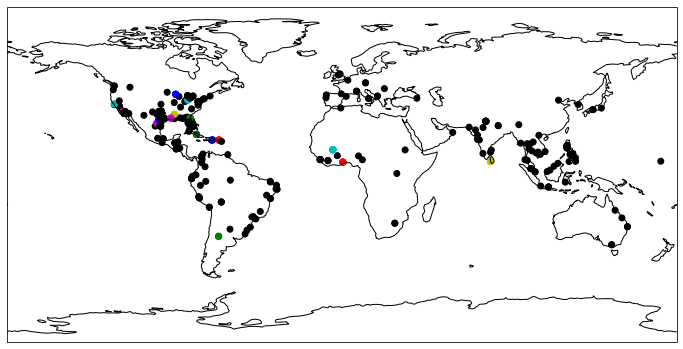

In [62]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.scatter(zika_longitudes, zika_latitudes, color=zika_colors)
ax.set_global()
ax.coastlines()
plt.show()
# I don't know how to properly cluster this data because it is on a globe
# I feel like this is a good enough job and shows that I have learned how to plot coordinates on a map, minorly cluster them
# and color them
# Zika Virus: A lot of points in the south of the United States

# Case Study 3 Solution

In [67]:
from cartopy.crs import PlateCarree
from cartopy.crs import LambertConformal
import cartopy
import matplotlib.pyplot as plt
from geonamescache import GeonamesCache
gc = GeonamesCache()
import pprint as pp
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from math import cos, sin, asin
import re
from unidecode import unidecode
import pandas as pd
from sklearn.cluster import KMeans
from math import cos, sin, asin

In [28]:
# 12.1 Extracting locations from headline data
# Loading headline data
headline_file = open('./CaseStudyFiles/headlines.txt', 'r')
headlines = [line.strip() for line in headline_file.readlines()]
num_headlines = len(headlines)
print(f"{num_headlines} headlines have been loaded")

650 headlines have been loaded


In [29]:
# Converting names to regexes
def name_to_regex(name):
    decoded_name = unidecode(name)
    if name != decoded_name:
        regex = fr'\b({name}|{decoded_name})\b'
    else:
        regex = fr'\b({name})\b'
    return re.compile(regex, flags=re.IGNORECASE)

In [30]:
# Mapping names to regexes
countries = [country['name'] for country in gc.get_countries().values()]
country_to_name = {name_to_regex(name): name for name in countries}

cities = [city['name'] for city in gc.get_cities().values()]
city_to_name = {name_to_regex(name): name for name in cities}
# print(city_to_name)

In [31]:
# Finding locations in text
def get_name_in_text(text, dictionary):
    for regex, name in sorted(dictionary.items(), key=lambda x: x[1]):
        if regex.search(text):
            return name
    return None

In [32]:
# Finding locations in headlines
matched_countries = [get_name_in_text(headline, country_to_name) for headline in headlines]
matched_cities = [get_name_in_text(headline, city_to_name) for headline in headlines]
data = {'Headline': headlines, 'City': matched_cities, 'Country': matched_countries}
df = pd.DataFrame(data)

In [33]:
# Summarizing the location data
summary = df[['City', 'Country']].describe()
print(summary)

       City Country
count   618      15
unique  511      10
top      Of  Brazil
freq     44       3


In [34]:
# Fetching cities named 'Of'
of_cities = df[df.City == 'Of'][['City', 'Headline']]
ten_of_cities = of_cities.head(10)
print(ten_of_cities.to_string(index=False))

City                                                                Headline
  Of                                   Case of Measles Reported in Vancouver
  Of Authorities are Worried about the Spread of Bronchitis in Silver Spring
  Of     Authorities are Worried about the Spread of Mad Cow Disease in Rome
  Of                    Rochester authorities confirmed the spread of Dengue
  Of                          Tokyo Encounters Severe Symptoms of Meningitis
  Of       Authorities are Worried about the Spread of Influenza in Savannah
  Of                                 Spike of Pneumonia Cases in Springfield
  Of                     The Spread of Measles in Spokane has been Confirmed
  Of                                         Outbreak of Zika in Panama City
  Of                         Urbana Encounters Severe Symptoms of Meningitis


In [35]:
# Finding multicity headlines
def get_cities_in_headline(headline):
    cities_in_headline = set()
    for regex, name in city_to_name.items():
        match = regex.search(headline)
        if match:
            if headline[match.start()].isupper():
                cities_in_headline.add(name)
                
    return list(cities_in_headline)

df['Cities'] = df['Headline'].apply(get_cities_in_headline)
df['Num_cities'] = df['Cities'].apply(len)
df_multiple_cities = df[df.Num_cities > 1]

num_rows, _ = df_multiple_cities.shape
print(f"{num_rows} headlines match multiple cities")

71 headlines match multiple cities


In [36]:
# Sampling multicity headlines
ten_cities = df_multiple_cities[['Cities', 'Headline']].head(10)
print(ten_cities.to_string(index=False))

                       Cities                                                   Headline
        [York, New York City]                            Could Zika Reach New York City?
         [Miami, Miami Beach]                          First Case of Zika in Miami Beach
              [San, San Juan] San Juan reports 1st U.S. Zika-related death amid outbreak
   [Los Ángeles, Los Angeles]                       New Los Angeles Hairstyle goes Viral
                 [Bay, Tampa]                      Tampa Bay Area Zika Case Count Climbs
       [Ho, Ho Chi Minh City]             Zika cases in Vietnam's Ho Chi Minh City surge
             [San, San Diego]                   Key Zika Findings in San Diego Institute
          [Hīt, Kuala Lumpur]                         Kuala Lumpur is Hit By Zika Threat
         [San, San Francisco]                           Zika Virus Reaches San Francisco
[San, San Salvador, Salvador]                               Zika worries in San Salvador


In [37]:
# Selecting the longest city names
def get_longest_city(cities):
    if cities:
        return max(cities, key=len)
    return None

df['City'] = df['Cities'].apply(get_longest_city)

In [38]:
# Printing the shortest city names
short_cities = df[df.City.str.len() <= 4][['City', 'Headline']]
print(short_cities.to_string(index=False))

City                                                            Headline
Lima                                 Lima tries to address Zika Concerns
Pune                                      Pune woman diagnosed with Zika
Rome Authorities are Worried about the Spread of Mad Cow Disease in Rome
Molo                                 Molo Cholera Spread Causing Concern
Miri                                                Zika arrives in Miri
Nadi                More people in Nadi are infected with HIV every year
Baud       Rumors about Tuberculosis Spreading in Baud have been Refuted
Kobe                                      Chikungunya re-emerges in Kobe
Waco                                 More Zika patients reported in Waco
Erie                                         Erie County sets Zika traps
Kent                                        Kent is infested with Rabies
Reno                  The Spread of Gonorrhea in Reno has been Confirmed
Sibu                                       Zika sym

In [39]:
# Fetching headlines with countries
df_countries = df[df.Country.notnull()][['City', 'Country', 'Headline']]
print(df_countries.to_string(index=False))

            City   Country                                                              Headline
          Recife    Brazil                               Mystery Virus Spreads in Recife, Brazil
Ho Chi Minh City   Vietnam                        Zika cases in Vietnam's Ho Chi Minh City surge
         Bangkok  Thailand                                        Thailand-Zika Virus in Bangkok
      Piracicaba    Brazil                                   Zika outbreak in Piracicaba, Brazil
           Klang  Malaysia                                      Zika surfaces in Klang, Malaysia
  Guatemala City Guatemala Rumors about Meningitis spreading in Guatemala City have been refuted
     Belize City    Belize                                    Belize City under threat from Zika
        Campinas    Brazil                                      Student sick in Campinas, Brazil
     Mexico City    Mexico                                  Zika outbreak spreads to Mexico City
   Kota Kinabalu  Malaysia    

In [40]:
# Dropping countries from the table
df.drop('Country', axis=1, inplace=True)

In [41]:
# Exploring unmatched headlines
df_unmatched = df[df.City.isnull()]
num_unmatched = len(df_unmatched)
print(f"{num_unmatched} headlines contain no city matches.")
print(df_unmatched.head(10)[['Headline']].values)

39 headlines contain no city matches.
[['Louisiana Zika cases up to 26']
 ['Zika infects pregnant woman in Cebu']
 ['Spanish Flu Sighted in Antigua']
 ['Zika case reported in Oton']
 ['Maka City Experiences Influenza Outbreak']
 ['West Nile Virus Outbreak in Saint Johns']
 ['Syphilis Hits Jefferson']
 ['Malaria Exposure in Sussex']
 ['Greenwich Establishes Zika Task Force']
 ['Will West Nile Virus vaccine help Parsons?']]


In [42]:
# Dropping unmatched headlines
df = df[~df.City.isnull()][['City', 'Headline']]

In [43]:
# 12.2 Visualizing and clustering the extracted location data
# Assigning geographic coordinates to cities
latitudes, longitudes = [], []
for city_name in df.City.values:
    city = max(gc.get_cities_by_name(city_name), key=lambda x: list(x.values())[0]['population']) # selects the city with the largest population
    city = list(city.values())[0]
    latitudes.append(city['latitude'])
    longitudes.append(city['longitude'])
    
df = df.assign(Latitude=latitudes, Longitude=longitudes) # add the latitude and longitudes to the table

C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


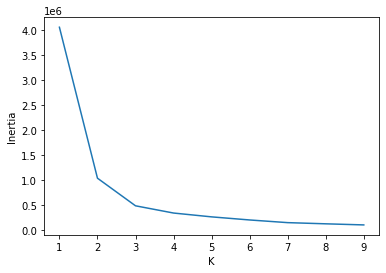

In [44]:
# Producing a geographic elbow curve
coordinates = df[['Latitude', 'Longitude']].values
k_values = range(1, 10)
inertia_values = []
for k in k_values:
    inertia_values.append(KMeans(k).fit(coordinates).inertia_)
    
plt.plot(range(1, 10), inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

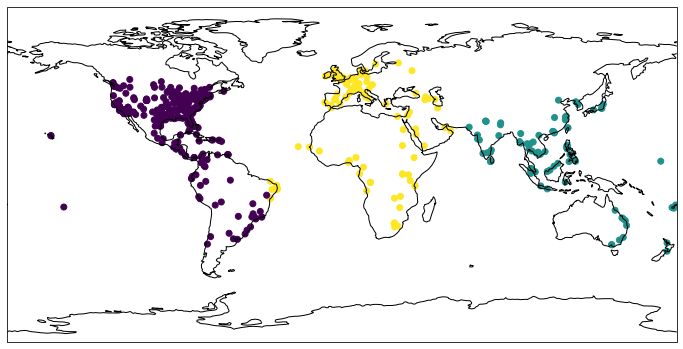

In [47]:
# Usign K-means to cluster cities into three groups
def plot_clusters(clusters, longitudes, latitudes):
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=PlateCarree())
    ax.coastlines()
    ax.scatter(longitudes, latitudes, c=clusters)
    ax.set_global()
    plt.show()
    
df['Cluster'] = KMeans(3).fit_predict(coordinates)
plot_clusters(df.Cluster, df.Longitude, df.Latitude)

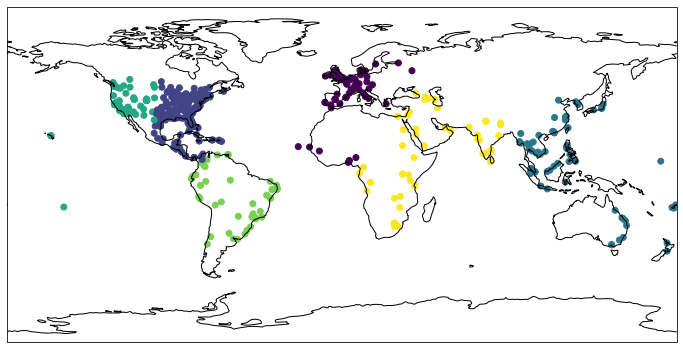

In [48]:
# Using K-means to cluster cities into six different groups
df['Cluster'] = KMeans(6).fit_predict(coordinates)
plot_clusters(df.Cluster, df.Longitude, df.Latitude)

In [51]:
# Defining a NumPy-based great-circle metric
def great_circle_distance(coord1, coord2, radius=3956):
    if np.array_equal(coord1, coord2):
        return 0.0
    
    coord1, coord2 = np.radians(coord1), np.radians(coord2)
    delta_x, delta_y = coord2 - coord1
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(coord1[0]), cos(coord2[0]), sin(delta_y / 2) ** 2])
    
    return 2 * radius * asin(haversin ** 0.5)

In [52]:
# Using DBSCAN to cluster cities
metric = great_circle_distance
dbscan = DBSCAN(eps=250, min_samples=3, metric=metric)
df['Cluster'] = dbscan.fit_predict(coordinates)

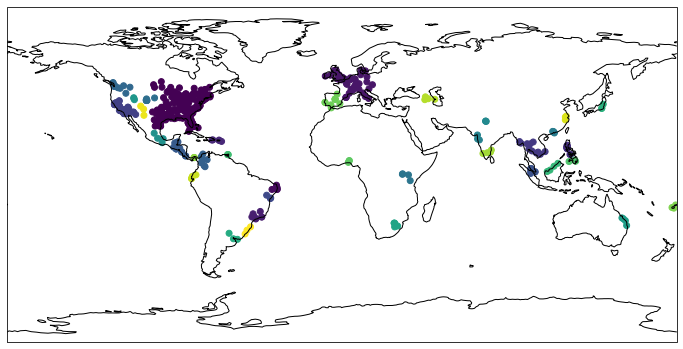

In [53]:
# Plotting non-outlier DBSCAN clusters
df_no_outliers = df[df.Cluster > -1]
plot_clusters(df_no_outliers.Cluster, df_no_outliers.Longitude, df_no_outliers.Latitude)

In [54]:
# Assigning country codes to cities
def get_country_code(city_name):
    city = max(gc.get_cities_by_name(city_name), key=lambda x: list(x.values())[0]['population'])
    return list(city.values())[0]['countrycode']

df['Country_code'] = df.City.apply(get_country_code)

In [55]:
# Separating US and global cities
df_us = df[df.Country_code == 'US']
df_not_us = df[df.Country_code != 'US']

In [57]:
# Reclustering extracted cities and removing outliers
def re_cluster(input_df, eps):
    input_coord = input_df[['Latitude', 'Longitude']].values
    dbscan = DBSCAN(eps=eps, min_samples=3, metric=great_circle_distance)
    clusters = dbscan.fit_predict(input_coord)
    input_df = input_df.assign(Cluster=clusters)
    return input_df[input_df.Cluster > -1]

df_not_us = re_cluster(df_not_us, 250)
df_us = re_cluster(df_us, 125)

In [58]:
# 12.3 Extracting insights from location clusters
groups = df_not_us.groupby('Cluster')
num_groups = len(groups)
print(f"{num_groups} Non-US clusters have been detected")

33 Non-US clusters have been detected


In [59]:
# Finding the largest cluster
sorted_groups = sorted(groups, key=lambda x: len(x[1]), reverse=True)
group_id, largest_group = sorted_groups[0]
group_size = len(largest_group)
print(f"Largest cluster contains {group_size} headlines")

Largest cluster contains 51 headlines


In [60]:
# Computing cluster centrality
def compute_centrality(group):
    group_coords = group[['Latitude', 'Longitude']].values
    center = group_coords.mean(axis=0)
    distance_to_center = [great_circle_distance(center, coord) for coord in group_coords]
    group['Distance_to_center'] = distance_to_center

In [61]:
# Finding the central headlines in the largest cluster
def sort_by_centrality(group):
    compute_centrality(group)
    return group.sort_values(by=['Distance_to_center'], ascending=True)

largest_group = sort_by_centrality(largest_group)
for headline in largest_group.Headline.values[:5]:
    print(headline)

Mad Cow Disease Disastrous to Brussels
Scientists in Paris to look for answers
More Livestock in Fontainebleau are infected with Mad Cow Disease
Mad Cow Disease Hits Rotterdam
Contaminated Meat Brings Trouble for Bonn Farmers


In [62]:
# Finding the top three countries in the largest cluster
from collections import Counter
def top_countries(group):
    countries = [gc.get_countries()[country_code]['name'] for country_code in group.Country_code.values]
    return Counter(countries).most_common(3)

print(top_countries(largest_group))

[('United Kingdom', 19), ('France', 7), ('Germany', 6)]


In [63]:
# Summarizing content in the largest clusters
for _, group in sorted_groups[1:5]:
    sorted_group = sort_by_centrality(group)
    print(top_countries(sorted_group))
    for headline in sorted_group.Headline.values[:5]:
        print(headline)
    print('\n')

[('Philippines', 16)]
Zika afflicts patient in Calamba
Hepatitis E re-emerges in Santa Rosa
More Zika patients reported in Indang
Batangas Tourism Takes a Hit as Virus Spreads
Spreading Zika reaches Bacoor


[('Thailand', 5), ('Cambodia', 3), ('Vietnam', 2)]
More Zika patients reported in Chanthaburi
Thailand-Zika Virus in Bangkok
Zika case reported in Phetchabun
Zika arrives in Udon Thani
More Zika patients reported in Kampong Speu


[('El Salvador', 3), ('Nicaragua', 2), ('Guatemala', 2)]
Zika arrives in Tegucigalpa
Zika Reported in Ilopango
More Zika cases in Soyapango
Zika worries in San Salvador
Spike of Rabies Cases in Managua


[('Canada', 10)]
Rumors about Pneumonia spreading in Ottawa have been refuted
More people in Toronto are infected with Hepatitis E every year
St. Catharines Patient in Critical Condition after Contracting Dengue
Varicella has Arrived in Milton
Rabies Exposure in Hamilton




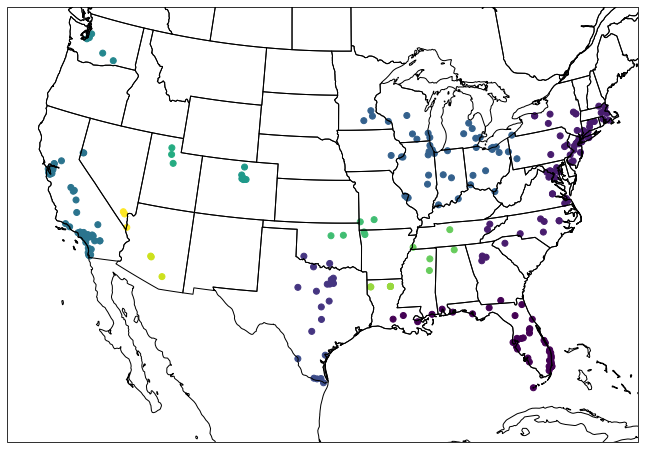

In [68]:
# Plotting US DBSCAN clusters
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
us_extent = (-120, -75, 20, 50)
ax.set_extent(us_extent)
ax.scatter(df_us.Longitude, df_us.Latitude, c=df_us.Cluster, transform=PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
plt.show()

In [69]:
# Summarizing content within the largest US clusters
us_groups = df_us.groupby('Cluster')
us_sorted_groups = sorted(us_groups, key=lambda x: len(x[1]), reverse=True)
for _, group in us_sorted_groups[:5]:
    sorted_group = sort_by_centrality(group)
    for headline in sorted_group.Headline.values[:5]:
        print(headline)
    print('\n')

Schools in Bridgeton Closed Due to Mumps Outbreak
Philadelphia experts track pandemic
Vineland authorities confirmed the spread of Chlamydia
Baltimore plans for Zika virus
Will Swine Flu vaccine help Annapolis?


Bradenton Experiences Zika Troubles
New Zika Case Confirmed in Sarasota County
Tampa Bay Area Zika Case Count Climbs
Zika Strikes St. Petersburg
Zika spreads to Plant City


Rhinovirus Hits Bakersfield
Schools in Tulare Closed Due to Mumps Outbreak
Santa Barbara tests new cure for Hepatitis C
New medicine wipes out West Nile Virus in Ventura
Zika symptoms spotted in Hollywood


How to Avoid Hepatitis E in South Bend
Hepatitis E Hits Hammond
Chicago's First Zika Case Confirmed
Rumors about Hepatitis C spreading in Darien have been refuted
Rumors about Rotavirus Spreading in Joliet have been Refuted


More Zika patients reported in Fort Worth
Outbreak of Zika in Stephenville
Zika symptoms spotted in Arlington
Dallas man comes down with case of Zika
Zika spreads to Lewisville




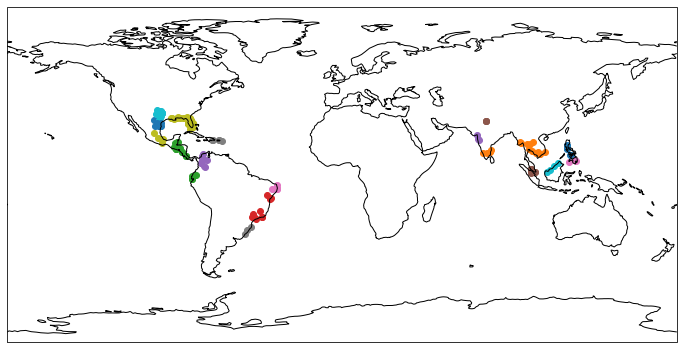

In [71]:
# Plotting Zika clusters
def count_zika_mentions(headlines):
    zika_regex = re.compile(r'\bzika\b', flags=re.IGNORECASE)
    zika_count = 0 
    for headline in headlines:
        if zika_regex.search(headline):
            zika_count += 1
            
    return zika_count

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
for _, group in sorted_groups + us_sorted_groups:
    headlines = group.Headline.values
    zika_count = count_zika_mentions(headlines)
    if float(zika_count) / len(headlines) > 0.5: # plots clusters where zika is mentioned the majority of the time
        ax.scatter(group.Longitude, group.Latitude)
        
ax.coastlines()
ax.set_global()
plt.show()

# Notes:
- Explore data prior to serious analysis
- Sometimes better to remove problematic data in an otherwise good dataset
- Heuristic tools are not guaranteed to work correctly every time (KMeans Inertia Plot)
- Common sense should dictate our anlysis of clustering ouputs
- Sometimes better to break the data set into multiple parts based on environment and context